## 타이타닉 데이터로 생존자 예측을 위한 EDA


[데이터 링크] https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# train.csv 파일 불러오기
titanic = pd.read_csv('./data/titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Q1. 데이터에서 남녀 성비를 구해주세요. 577 : 314
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [4]:
# Q2. 데이터에서 여성 승객들의 평균 fare를 구해주세요.
titanic.pivot_table(values='Fare', index='Sex', aggfunc='mean').loc['female']

Fare    44.479818
Name: female, dtype: float64

In [5]:
# Q3. 이름에 Mr.가 포함된 사람이 몇명인지 구해주세요.
titanic['Name'].apply(lambda n: 'Mr.' in n).sum()

517

In [6]:
# 결측치를 하나라도 포함하고 있는 데이터가 몇개나 있는지 확인.
titanic.isnull().any(axis=1).sum()

708

## 2.5. Pivot Table을 이용하여 데이터 살펴보기

- pivot table이란 기존 테이블 구조를 특정 column을 기준으로 재구조화한 테이블을 말합니다.

- 특정 column을 기준으로 pivot하기 때문에, 어떤 column에 어떤 연산을 하느냐에 따라서 만들어지는 결과가 바뀝니다.

- 주로 어떤 column을 기준으로 데이터를 해석하고 싶을 때 사용합니다.

In [7]:
# 성별을 기준으로 생존률 파악 --> Mean vs Sum
titanic.pivot_table(values='Survived', index='Sex', aggfunc='mean')

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
titanic.pivot_table(values='Survived', index='Sex', aggfunc='sum')

,Survived
Sex,
female,233
male,109


In [9]:
# 사회 계급을 기준으로 생존률 파악
titanic.pivot_table(values='Survived', index='Pclass', aggfunc='mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


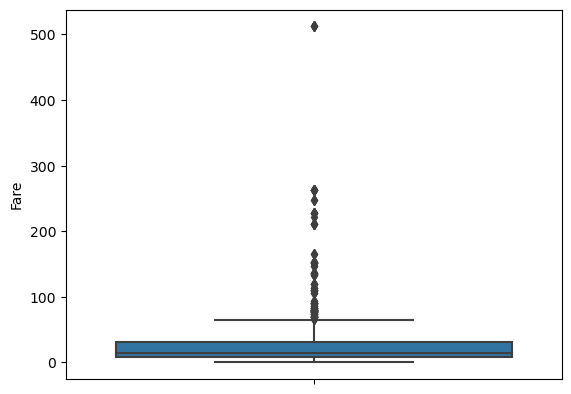

In [11]:
sns.boxplot(data=titanic, y='Fare')
plt.show()

## 1. 결측치가 존재하는지
## 2. dtype이 object인 column이 있는지
## 3. target value의 distribution이 어떻게 되는지

In [12]:
# 1. 결측치가 존재하는지
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic.isnull().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
titanic[titanic.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
# 2. dtype이 object인 column이 있는지
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic.loc[:, titanic.dtypes=='object']

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [17]:
obj_columns = titanic.columns[titanic.dtypes=='object']
obj_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [18]:
# 3. target value의 distribution이 어떻게 되는지

In [19]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

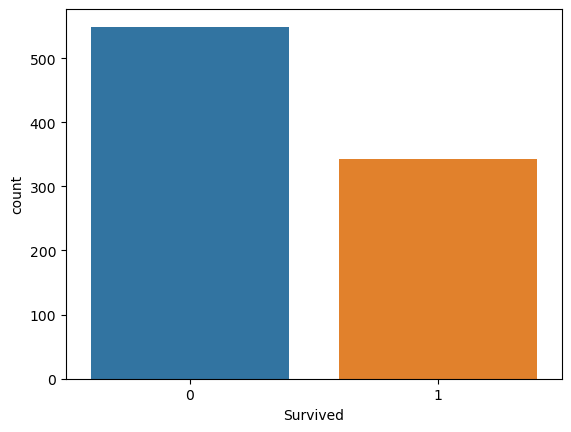

In [20]:
sns.countplot(data=titanic, x='Survived')
plt.show()

In [21]:
# 4. correlation matrix heatmap
# obj_columns = titanic.columns[titanic.dtypes=='object']
# corr = titanic[titanic.columns.difference(obj_columns)].corr()
corr = titanic.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


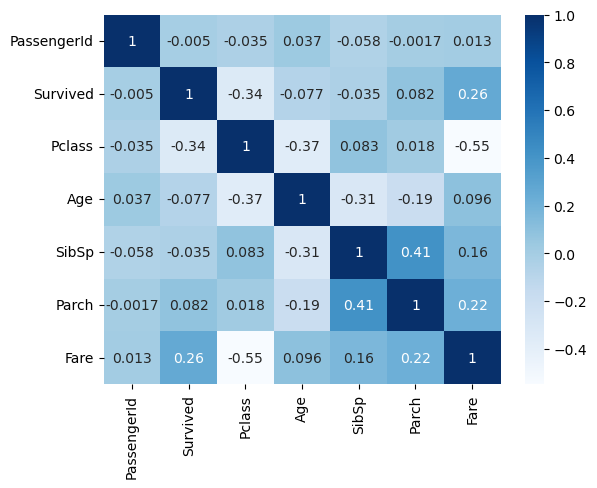

In [22]:
sns.heatmap(data=corr, annot=True, cmap='Blues')
plt.show()

## 5. 결측치에 대한 EDA

In [23]:
cabin_cond = titanic['Cabin'].isnull()

In [24]:
cabin_nan = titanic.loc[cabin_cond]
cabin_nan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,687.000000,687.000000,687.000000,529.000000,687.000000,687.000000,687.000000
mean,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325
std,259.215905,0.458528,0.589602,13.472634,1.207492,0.827106,28.663343
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.877100
50%,441.000000,0.000000,3.000000,26.000000,0.000000,0.000000,10.500000
75%,664.500000,1.000000,3.000000,35.000000,1.000000,0.000000,23.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


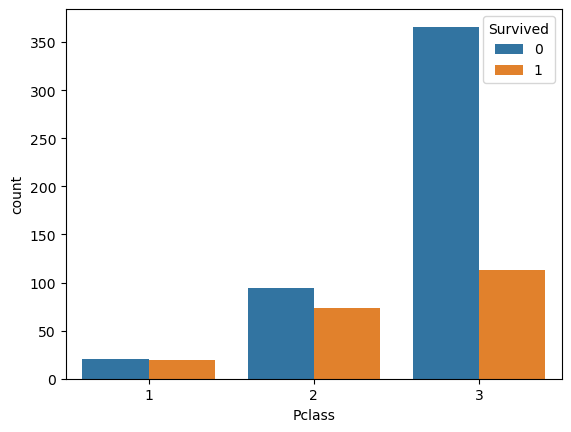

In [25]:
sns.countplot(data=cabin_nan, x='Pclass', hue='Survived')
plt.show()

In [26]:
cabin = titanic.loc[~cabin_cond]
cabin.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,204.000000,185.000000,204.000000,204.000000,204.000000
mean,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
std,251.379279,0.472564,0.525961,15.679356,0.628918,0.729976,74.391749
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,261.750000,0.000000,1.000000,24.000000,0.000000,0.000000,29.453125
50%,457.500000,1.000000,1.000000,36.000000,0.000000,0.000000,55.220850
75%,684.000000,1.000000,1.000000,48.000000,1.000000,1.000000,89.328150
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [27]:
cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


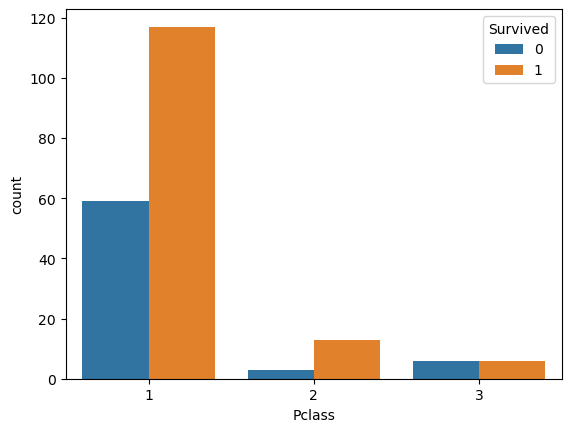

In [28]:
sns.countplot(data=cabin, x='Pclass', hue='Survived')
plt.show()

## 전처리
1. 결측치에 대한 전처리
1-1. Cabin -> is_cabin
1-2. Age -> Age의 평균값으로 대체
1-3. Embarked -> drop
2. dtype이 object인 column들에 대한 전처리
2-1. Ordinal Encoding(숫자로 변환)

In [29]:
# 1. 결측치에 대한 전처리
# 1-1. Cabin -> is_cabin
def is_cabin(x):
    return 0 if isinstance(x, float) and np.isnan(x) else 1

def is_cabin2(x):
    try:
        return 0 if np.isnan(x) else 1
    except:
        return 1

titanic['is_cabin']=titanic.Cabin.apply(is_cabin2)
titanic[['is_cabin','Cabin']].head()

,is_cabin,Cabin
0,0,NaN
1,1,C85
2,0,NaN
3,1,C123
4,0,NaN


In [30]:
if np.NaN:
    print(True)
else:
    print(False)

True


In [31]:
if None:
    print(True)
else:
    print(False)

False


In [32]:
if np.NaN == np.NaN:
    print(True)
else:
    print(False)

False


In [33]:
# 1-2. Age -> Age의 평균값으로 대체
titanic['Age'] = titanic.Age.fillna(titanic.Age.mean())

In [34]:
# 1-3. Embarked -> drop
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [35]:
titanic[titanic.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_cabin
61,1,1,female,38.0,0,0,80.0,NaN,1
829,1,1,female,62.0,0,0,80.0,NaN,1


In [36]:
titanic = titanic.dropna()

In [37]:
# 2. dtype이 object인 column들에 대한 전처리
# 2-1. Ordinal Encoding(숫자로 변환)
titanic.Sex = pd.factorize(titanic.Sex)[0]

In [38]:
titanic.Embarked = pd.factorize(titanic.Embarked)[0]

In [39]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_cabin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681,0.362205,0.227222
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.636157,0.419273
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


## modeling

In [40]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [41]:
X = titanic.drop(columns=["Survived"])  # define feature vector
y = titanic.Survived                    # define target value

clf = LogisticRegression()              # define model
clf.fit(X, y)                           # fitting(=training)
clf.score(X, y)                         # Accuracy

C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8053993250843644

In [42]:
X = titanic.drop(columns=["Survived"])  # define feature vector
y = titanic.Survived                    # define target value

clf = LinearRegression()              # define model
clf.fit(X, y)                           # fitting(=training)
clf.score(X, y)                         # Accuracy

0.4003200462944818